In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../stats/inserts.csv", sep=",")
totals = data.iloc[-1].copy()
data.columns = ['palavra', 'status', 'tempo de execução', 'comparações', 'altura']
data = data.drop(data.tail(1).index)

data

,palavra,status,tempo de execução,comparações,altura
0,ultimate,1.0,0.0,1,2;
1,prepara,1.0,0.0,2,3;
2,duas,1.0,0.0,1,3;
3,lutas,1.0,0.0,2,3;
4,para,1.0,0.0,3,4;
...,...,...,...,...,...
41873,medio,2.0,0.0,13,24;
41874,mike,2.0,0.0,13,24;
41875,x,2.0,0.0,11,24;
41876,alex,2.0,0.0,14,24;


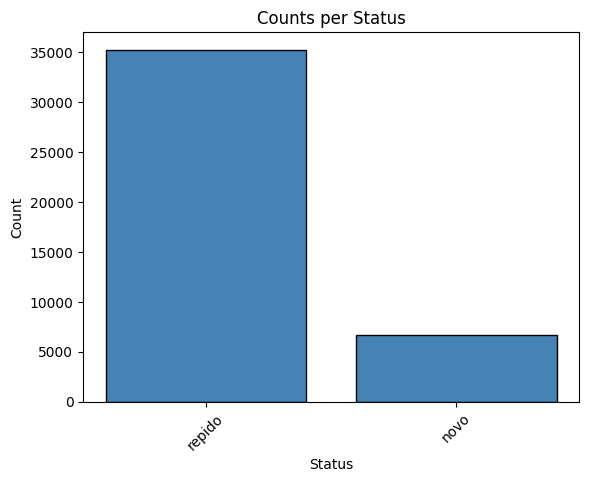

In [12]:
import matplotlib.pyplot as plt

# Get the value counts of the 'status' column
status_counts = data['status'].value_counts()

# Plot correctly: status names on X-axis, counts on Y-axis
plt.bar(status_counts.index.astype(str), status_counts.values, color='steelblue', edgecolor='black',)

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Counts per Status")
plt.xticks(rotation=45)
plt.xticks(np.arange(2), ['repido', 'novo']) 
plt.show()


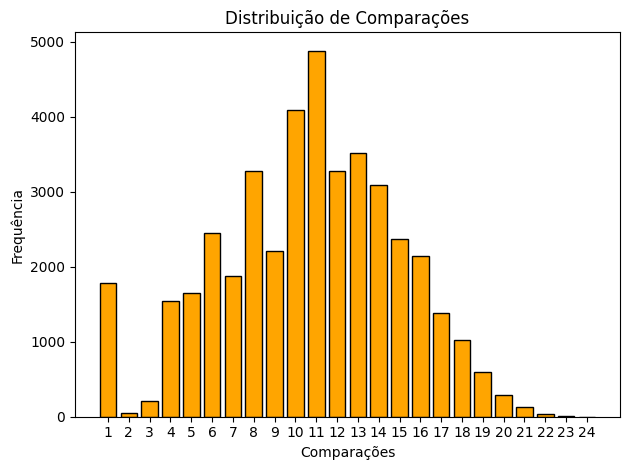

In [ ]:
#contador de frequencia de comparações
comp_counts = data['comparações'].value_counts()
comp_counts.index = comp_counts.index.astype(int)
comp_counts = comp_counts.sort_index()

labels = comp_counts.index.astype(str)
plt.bar(labels, comp_counts.values, color='orange', edgecolor='black')
plt.xlabel("Comparações")
plt.ylabel("Frequência")
plt.title("Distribuição de Comparações")
plt.tight_layout()
plt.show()
